<a href="https://colab.research.google.com/github/casperbh96/COVID-19-Detection/blob/master/Deep_Learning_for_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing, Cloning & Importing

In [0]:
!pip install --upgrade tensorflow-gpu

In [1]:
# Update dataset: !git pull
!git clone https://github.com/casperbh96/COVID-19-Detection.git dataset

Cloning into 'dataset'...
remote: Enumerating objects: 2715, done.
remote: Counting objects: 100% (2715/2715), done.
remote: Compressing objects: 100% (2694/2694), done.
remote: Total 2715 (delta 46), reused 2673 (delta 19), pack-reused 0
Receiving objects: 100% (2715/2715), 41.41 MiB | 40.53 MiB/s, done.
Resolving deltas: 100% (46/46), done.


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2, time

# Loading The Datasets

In [17]:
covid_path = 'dataset/covid_dataset.csv'
covid_image_path = 'dataset/covid_adjusted/'

normal_path = 'dataset/normal_xray_dataset.csv'
normal_image_path = 'dataset/normal_dataset/'

covid_df = pd.read_csv(covid_path, usecols=['filename', 'finding'])
normal_df = pd.read_csv(normal_path, usecols=['filename', 'finding'])

covid_df.head()

,filename,finding
0,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,COVID-19
1,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,COVID-19
2,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,COVID-19
3,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,COVID-19
4,nejmc2001573_f1a.jpeg.jpg,COVID-19


(224, 224, 3)

In [0]:
covid_images = []
covid_labels = []

for index, row in covid_df.iterrows():
    filename = row['filename']
    label = row['finding']
    path = covid_image_path + filename

    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    covid_images.append(image)
    covid_labels.append(label)

normal_images = []
normal_labels = []

for index, row in normal_df.iterrows():
    filename = row['filename']
    label = row['finding']
    path = normal_image_path + filename

    # temporary fix while we preprocess ALL the images
    if filename == '4c268764-b5e5-4417-85a3-da52916984d8.jpg':
        break

    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    normal_images.append(image)
    normal_labels.append(label)

# normalize to interval of [0,1]
covid_images = np.array(covid_images) / 255

# normalize to interval of [0,1]
normal_images = np.array(normal_images) / 255

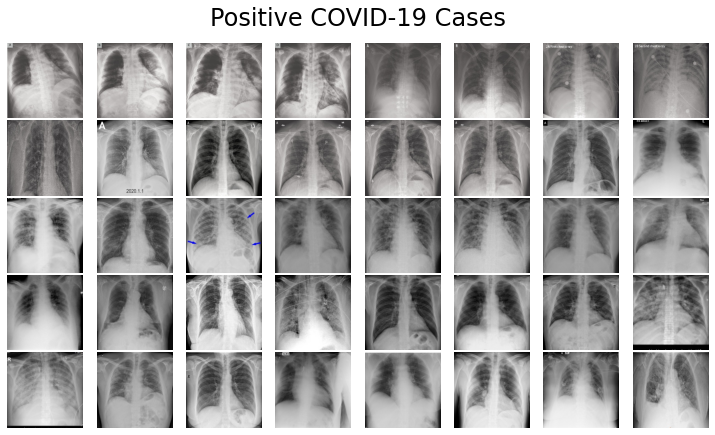

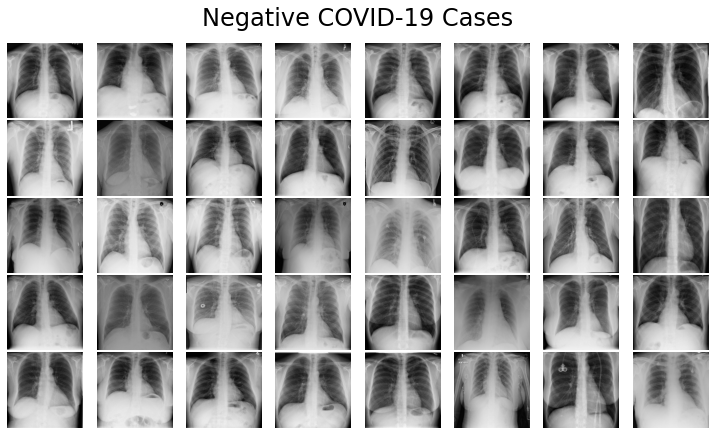

In [39]:
nrows, ncols = 5, 8
figsize = [10, 6]

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, facecolor=(1, 1, 1))

for i, axi in enumerate(ax.flat):
    axi.imshow(covid_images[i])
    axi.set_axis_off()

plt.suptitle('Positive COVID-19 Cases', fontsize=24)
plt.tight_layout(pad=0.2, rect=[0, 0, 1, 0.9])
plt.show()

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, facecolor=(1, 1, 1))

for i, axi in enumerate(ax.flat):
    axi.imshow(normal_images[i])
    axi.set_axis_off()

plt.suptitle('Negative COVID-19 Cases', fontsize=24)
plt.tight_layout(pad=0.2, rect=[0, 0, 1, 0.9])
plt.show()

# Using The Datasets

In [0]:
import tensorflow as tf